In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Reading the CSV file into a DataFrame
file_path = 'googleplaystore.csv'  # Replace with the correct path to your CSV file if necessary
google_play_data = pd.read_csv(file_path)


In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head(5)
# df["Installs"].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# DataPreparation


### Question 1:
- Objective: Write a Python function treat_non_numeric_chars that removes all non-numeric characters from the specified columns in a DataFrame. The columns to be cleaned are "Installs", "Size", and "Price".

### Question 2:
- Objective: Write a Python function treat_nan_values that replaces all NaN values in the specified columns with a default value (e.g., 0 or a custom value of your choice).

### Question 3:
- Objective: Write a Python function convert_column_to_float to convert the data type of the specified columns ("Installs", "Size", "Price") into float.

In [10]:

valid_numeric_chars=("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", ".")


class ColumnTreatment:
    def __init__(self, df,valid_numeric_chars):
        self.df = df
        self.valid_numeric_chars = valid_numeric_chars

    # Treat non-numeric characters in a column
    def treat_non_numeric_chars(self, column_name, new_char, valid_numeric_chars):
        cleaned_col = []
        for x in self.df[column_name]:
            for char in x:
                if char not in valid_numeric_chars:
                    x = x.replace(char, new_char)
            cleaned_col.append(x)
        self.df[column_name] = cleaned_col

    # Replace empty strings with NaN in a column
    def treat_empty_strings(self, column_name):
        self.df[column_name] = self.df[column_name].replace('', np.nan)

    # Change the data type of a column
    def change_data_type(self, column_name, dtype):
        self.df[column_name] = self.df[column_name].astype(dtype)

    # Apply all treatments for multiple columns
    def apply_treatments(self, columns, new_char, dtype):
        for column in columns:
            self.treat_non_numeric_chars(column, new_char,valid_numeric_chars)
            self.treat_empty_strings(column)
            self.change_data_type(column, dtype)



In [11]:
# Initialize the class with the DataFrame
ct = ColumnTreatment(df,valid_numeric_chars=("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "."))

# List of columns to treat
columns = ["Size", "Price", "Installs","Reviews"]

# Apply treatments to the specified columns
ct.apply_treatments(columns, new_char="", dtype="float")




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


### Apply the column teartemnts to Last Updated column too 

In [14]:
# Initialize the class with the DataFrame
ct = ColumnTreatment(df,valid_numeric_chars=("."))

# List of columns to treat
columns = ["Last Updated"]

# Apply treatments to the specified columns
# ct.apply_treatments(columns, new_char="", dtype="float")


### Check if all teh requiered columns have been converted to flaot data type

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


# Seperating the Last UPdated column into Day Month and Year

In [18]:
import numpy as np

Invalid_numeric_chars=(".")


class ColumnTreatment:
    def __init__(self, df,Invalid_numeric_chars):
        self.df = df
        self.Invalid_numeric_chars = Invalid_numeric_chars

    # Treat non-numeric characters in a column
    def treat_non_numeric_chars(self, column_name, new_char, Invalid_numeric_chars):
        cleaned_col = []
        for x in self.df[column_name]:
            for char in x:
                if char in Invalid_numeric_chars:
                    x = x.replace(char, new_char)
            cleaned_col.append(x)
        self.df[column_name] = cleaned_col

    # Replace empty strings with NaN in a column
    def treat_empty_strings(self, column_name):
        self.df[column_name] = self.df[column_name].replace('', np.nan)

    # Change the data type of a column
    def change_data_type(self, column_name, dtype):
        self.df[column_name] = self.df[column_name].astype(dtype)

    # Apply all treatments for multiple columns
    def apply_treatments(self, columns, new_char, dtype):
        for column in columns:
            self.treat_non_numeric_chars(column, new_char,Invalid_numeric_chars)
            self.treat_empty_strings(column)
            self.change_data_type(column, dtype)



In [19]:
# Initialize the class with the DataFrame
ct = ColumnTreatment(df,Invalid_numeric_chars=("."))

# List of columns to treat
columns = ["Last Updated"]

# Apply treatments to the specified columns
# ct.apply_treatments(columns, new_char="", dtype="float")



In [20]:
# Convert the "Last Updated" column to datetime format with error handling
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors='coerce')


In [21]:
# Seperate the Android Ver into Day Month Year
# Extract Day, Month, and Year into separate columns
df["Day"] = df["Last Updated"].dt.day
df["Month"] = df["Last Updated"].dt.month
df["Year"] = df["Last Updated"].dt.year

In [22]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0


# 56:10

# EDA

### Seperating the numerical and categorical columns 

In [26]:
numerical_columns =  []
categorical_columns = []
for cols in df.columns:
    if df[cols].dtype == "float":
        numerical_columns.append(cols)
    else:
        categorical_columns.append(cols)

print("numerical columns : ",numerical_columns)
print("categorical columns :", categorical_columns)



numerical columns :  ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
categorical columns : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


# 01:01:00

#### Determine the Percentages of the diffrent categories in the Category column of the df

In [29]:
categories = df["Category"].value_counts()
type(categories)
categories = categories.reset_index().head(10)

### Which category is the most popular category in the app?
### What are the Top 10 important caegories in the app?

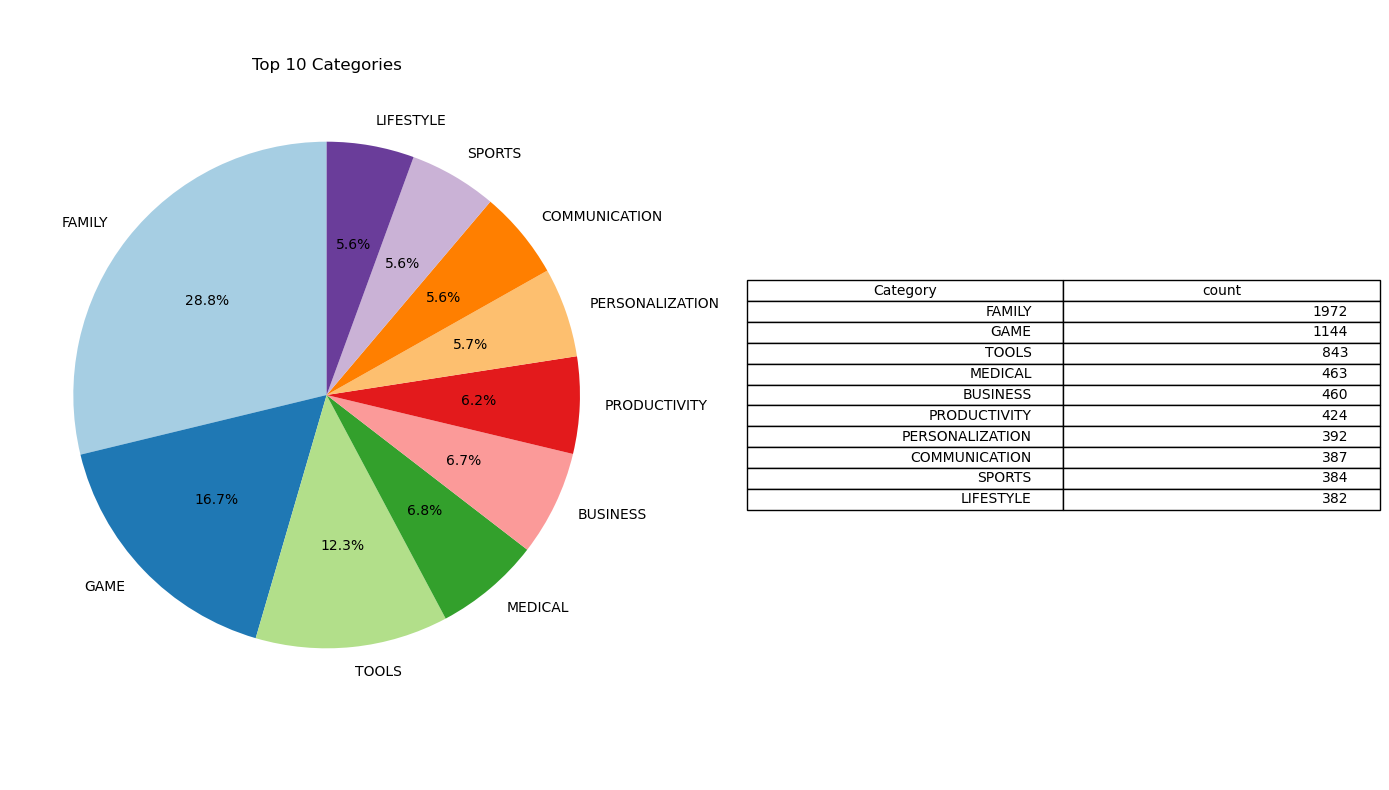

In [31]:
# Plot the pie chart and table as subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 8))  # 1 row, 2 columns

# Pie chart
axs[0].pie(categories["count"], labels=categories["Category"], autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title("Pie Chart of Categories")

# Table chart
axs[1].axis("off")  # Turn off the axis for the table
axs[0].set_title("Top 10 Categories")
table = axs[1].table(
    cellText=categories.values,
    colLabels=["Category", "count"],
    loc="center",
)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Which category has the highest Installations ? 1:20:00


In [33]:
# Replace NaN or infinite values with 0 or another suitable value
df["Installs"] = df["Installs"].fillna(0)

# Convert the column to int64
df["Installs"] = df["Installs"].astype("int64")

In [34]:
Highest_Installs = df.groupby("Category")["Installs"].sum()
Highest_Installs = Highest_Installs.reset_index()

In [35]:
Highest_Installs = Highest_Installs.sort_values("Installs",ascending=False).head(10)
Highest_Installs

,Category,Installs
15,GAME,35086024415
7,COMMUNICATION,32647276251
26,PRODUCTIVITY,14176091369
28,SOCIAL,14069867902
30,TOOLS,11452771915
12,FAMILY,10258263505
25,PHOTOGRAPHY,10088247655
22,NEWS_AND_MAGAZINES,7496317760
31,TRAVEL_AND_LOCAL,6868887146
32,VIDEO_PLAYERS,6222002720


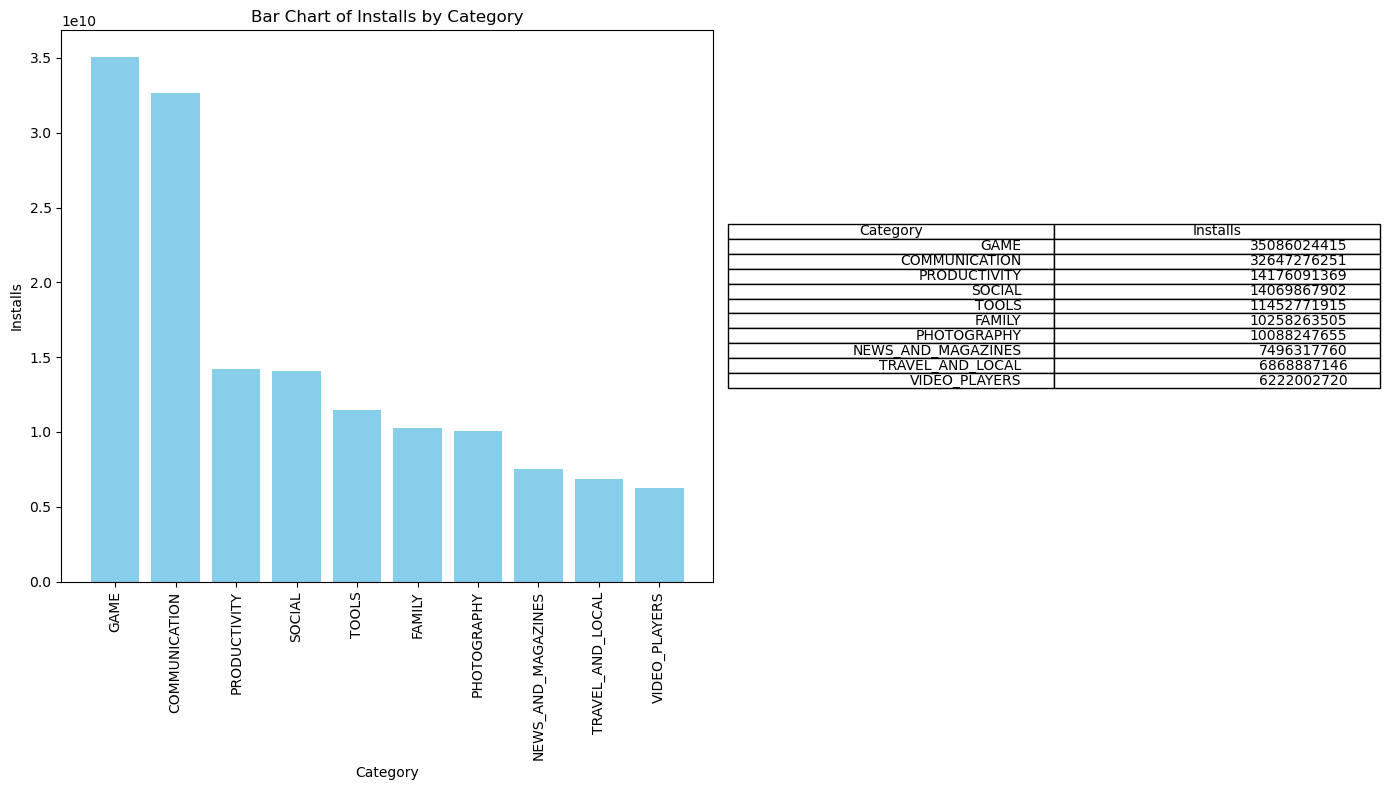

In [36]:
# Plot the bar chart and table chart as subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 8))  # 1 row, 2 columns

# Bar chart
axs[0].bar(Highest_Installs["Category"], Highest_Installs["Installs"], color='skyblue')
axs[0].set_title("Bar Chart of Installs by Category")
axs[0].set_xlabel("Category")
axs[0].set_ylabel("Installs")
axs[0].tick_params(axis="x", rotation=90)  # Rotate category labels for better readability

# Table chart
axs[1].axis("off")  # Turn off the axis for the table
table = axs[1].table(
    cellText=Highest_Installs.values,
    colLabels=["Category", "Installs"],
    loc="center",
)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Which are the top 5 Installed Category Apps in each Type?

In [38]:
df["Type"].value_counts().reset_index()

,Type,count
0,Free,10039
1,Paid,800
2,0,1


In [39]:
df["App"].reset_index().head(5)

,index,App
0,0,Photo Editor & Candy Camera & Grid & ScrapBook
1,1,Coloring book moana
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,3,Sketch - Draw & Paint
4,4,Pixel Draw - Number Art Coloring Book


In [40]:
Type_Installs = df.groupby(["Type","Category"])["Installs"].sum()
Type_Installs = Type_Installs.sort_values(ascending=False)

In [41]:
Type_Installs_df = Type_Installs.reset_index()

In [42]:
# Filter the DataFrame for 'Free' Type and take the top 5 rows
free_installs = Type_Installs_df[Type_Installs_df["Type"] == "Free"].head(5)

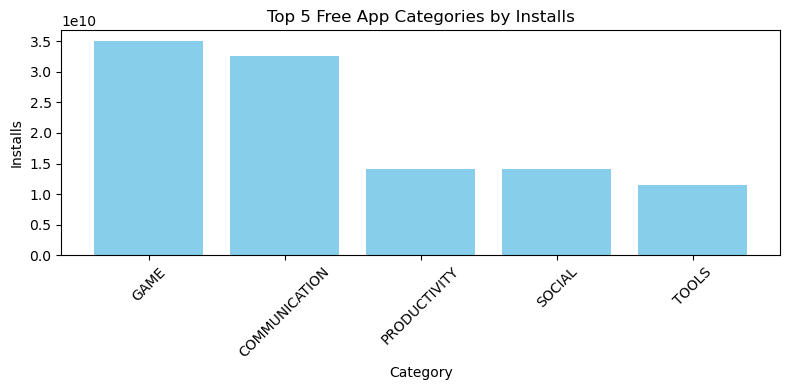

In [43]:
# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.bar(free_installs["Category"], free_installs["Installs"], color='skyblue')
plt.title("Top 5 Free App Categories by Installs")
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [44]:
# Filter the DataFrame for 'Paid' Type and take the top 5 rows
paid_installs = Type_Installs_df[Type_Installs_df["Type"] == "Paid"].head(5)

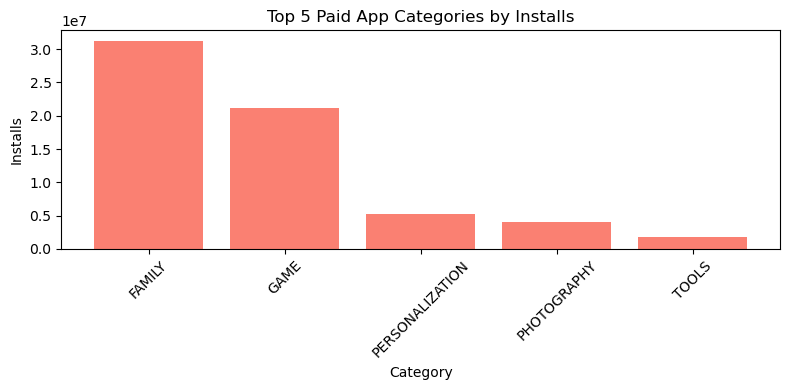

In [45]:
# Plot the bar chart for 'Paid' apps
plt.figure(figsize=(8, 4))
plt.bar(paid_installs["Category"], paid_installs["Installs"], color='salmon')
plt.title("Top 5 Paid App Categories by Installs")
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Which Category app users are reviewing the most?

In [47]:
df["Reviews"] = df["Reviews"].astype("int64")

In [48]:
Users_Reviews = df.groupby(["Category"])["Reviews"].sum()

In [86]:
df_Users_Reviews = Users_Reviews.reset_index().head(10)
df_Users_Reviews.sort_values("Reviews",ascending = False)

,Category,Reviews
7,COMMUNICATION,815462260
9,EDUCATION,39595786
4,BOOKS_AND_REFERENCE,21959069
5,BUSINESS,13954552
8,DATING,7291278
6,COMICS,3383276
1,ART_AND_DESIGN,1714440
2,AUTO_AND_VEHICLES,1163666
3,BEAUTY,396240
0,1.9,3


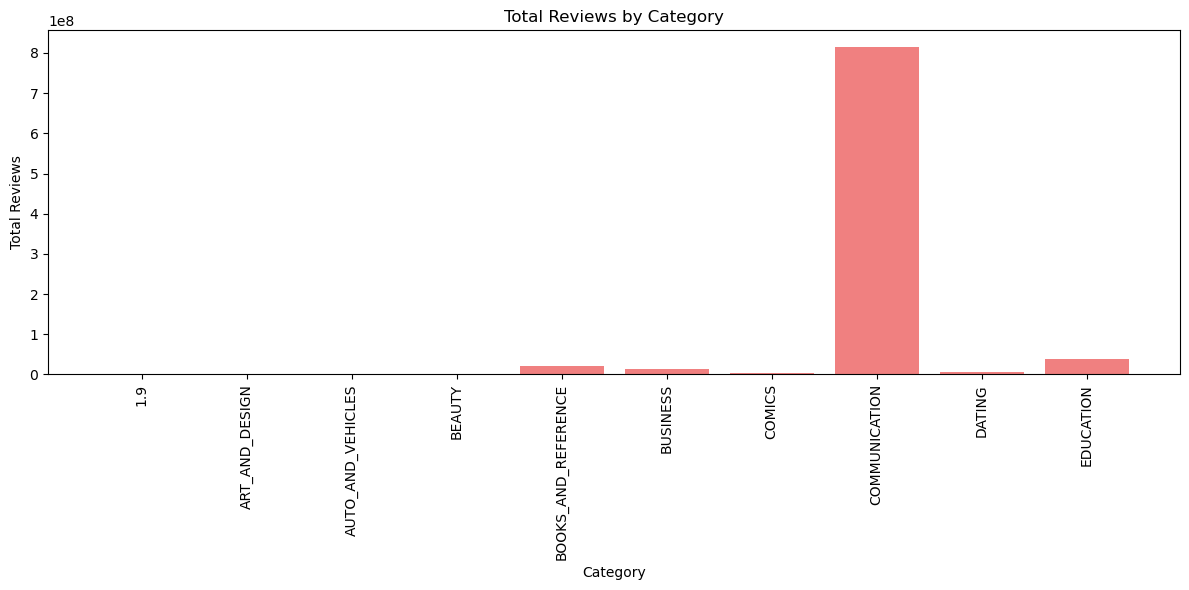

In [50]:
# Plot the bar chart for Users_Reviews by Category
plt.figure(figsize=(12, 6))
plt.bar(df_Users_Reviews["Category"], df_Users_Reviews["Reviews"], color='lightcoral')
plt.title("Total Reviews by Category")
plt.xlabel("Category")
plt.ylabel("Total Reviews")
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()